Point 1/100: 09:54:17 UTC | Lat -12.79, Lon 175.82
Point 2/100: 09:54:28 UTC | Lat -12.24, Lon 176.24
Point 3/100: 09:54:38 UTC | Lat -11.73, Lon 176.62
Point 4/100: 09:54:48 UTC | Lat -11.23, Lon 176.99
Point 5/100: 09:54:58 UTC | Lat -10.73, Lon 177.37
Point 6/100: 09:55:09 UTC | Lat -10.17, Lon 177.78
Point 7/100: 09:55:19 UTC | Lat -9.67, Lon 178.15
Point 8/100: 09:55:30 UTC | Lat -9.11, Lon 178.55
Point 9/100: 09:55:40 UTC | Lat -8.61, Lon 178.92
Point 10/100: 09:55:50 UTC | Lat -8.10, Lon 179.29
Point 11/100: 09:56:01 UTC | Lat -7.54, Lon 179.69
Point 12/100: 09:56:11 UTC | Lat -7.04, Lon -179.94
Point 13/100: 09:56:21 UTC | Lat -6.53, Lon -179.58
Point 14/100: 09:56:32 UTC | Lat -5.97, Lon -179.18
Point 15/100: 09:56:42 UTC | Lat -5.46, Lon -178.81
Point 16/100: 09:56:52 UTC | Lat -4.95, Lon -178.45
Point 17/100: 09:57:02 UTC | Lat -4.44, Lon -178.09
Point 18/100: 09:57:13 UTC | Lat -3.88, Lon -177.69
Point 19/100: 09:57:23 UTC | Lat -3.37, Lon -177.33
Point 20/100: 09:57:34 UTC

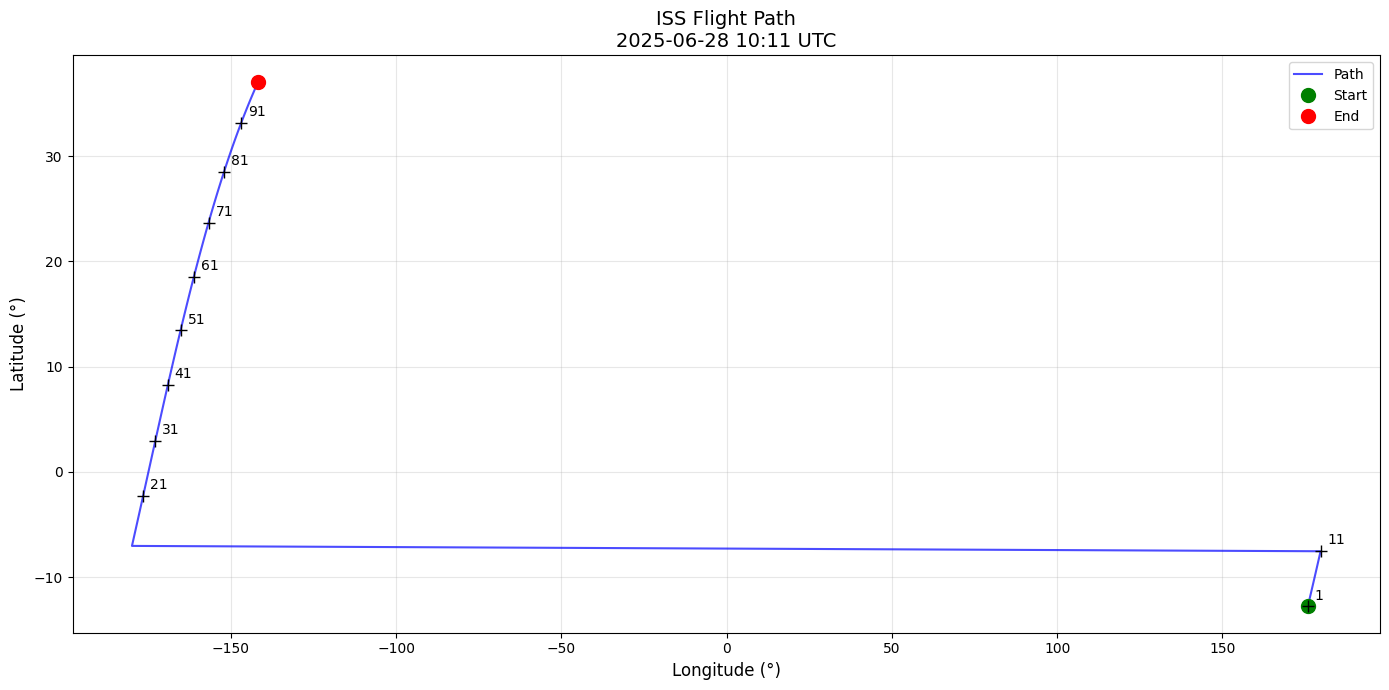

Data saved as iss_data.txt


In [1]:
!pip install requests matplotlib

import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Collect ISS data
url = "https://api.wheretheiss.at/v1/satellites/25544"
timestamps, latitudes, longitudes = [], [], []

print("Collecting ISS location data (will take ~17 minutes)...")
for i in range(100):  # Get 100 data points
    try:
        response = requests.get(url, timeout=10)
        data = response.json()
        latitudes.append(data['latitude'])
        longitudes.append(data['longitude'])
        ts = datetime.utcfromtimestamp(data['timestamp']).strftime('%H:%M:%S')
        print(f"Point {i+1}/100: {ts} UTC | Lat {data['latitude']:.2f}, Lon {data['longitude']:.2f}")
        time.sleep(10)
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(10)

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(longitudes, latitudes, 'b-', alpha=0.7, label='Path')
plt.plot(longitudes[0], latitudes[0], 'go', markersize=10, label='Start')
plt.plot(longitudes[-1], latitudes[-1], 'ro', markersize=10, label='End')

# Add markers every 10 points
for i in range(0, len(longitudes), 10):
    plt.plot(longitudes[i], latitudes[i], 'k+', markersize=8)
    plt.annotate(f"{i+1}", (longitudes[i], latitudes[i]),
                 xytext=(5,5), textcoords='offset points')

plt.title('ISS Flight Path\n' + datetime.now().strftime('%Y-%m-%d %H:%M UTC'),
          fontsize=14)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Save and display
plt.savefig('iss_path.png', dpi=120)
print("\nPlot saved as iss_path.png")
plt.show()

# Save data to file
with open('iss_data.txt', 'w') as f:
    f.write("Timestamp,Latitude,Longitude\n")
    for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
        f.write(f"{timestamps[i] if i < len(timestamps) else 'N/A'},{lat},{lon}\n")

print("Data saved as iss_data.txt")